In [7]:
import numpy as np
import pandas as pd
import re

In [8]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [10]:
df.duplicated().sum()

122

In [11]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,bptp pedestal,sector 70a,1.6,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3,3,3,"servant room,others",2.0,North-East,0 to 1 Year Old,"['Ninex Mall', 'Airia Mall', 'Meditree Market', 'OMAXE Gurgaon Mall', 'Shaheed Bhagat Singh Chowk', 'Sohna Rd', ""St. Angel's Global"", 'Kunskapsskolan International', 'ISKCON', 'HDFC Bank ATM', 'Ektaa Hospitals', 'Oriental Bank of Commerce', 'De Adventure Park', 'Urusvati Museum Of Folklore', 'Leopard hills']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']"


## 1. areaWithType

In [12]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1658,1.18,1450.0,Carpet area: 1450 (134.71 sq.m.)
1088,0.95,1450.0,Carpet area: 1450 (134.71 sq.m.)
3275,1.40,2356.0,Super Built up area 2356(218.88 sq.m.)
3735,2.00,1967.0,Carpet area: 1967 (182.74 sq.m.)
2959,0.70,1200.0,Built Up area: 1200 (111.48 sq.m.)


In [13]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [14]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [15]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [16]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1) # every row 

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [17]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3199,1.10,flat,882.0,Super Built up area 1640(152.36 sq.m.)Built Up area: 1173 sq.ft. (108.98 sq.m.)Carpet area: 882 sq.ft. (81.94 sq.m.),1640.0,1173.0,882.0
2947,0.41,flat,594.0,Carpet area: 601 (55.83 sq.m.),NaN,NaN,601.0
32,1.30,flat,2580.0,Built Up area: 2580 (239.69 sq.m.),NaN,2580.0,NaN
312,0.75,flat,1000.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),NaN,1000.0,650.0
2195,0.60,flat,600.0,Super Built up area 600(55.74 sq.m.)Carpet area: 514 sq.ft. (47.75 sq.m.),600.0,NaN,514.0


In [18]:
df.duplicated().sum()

122

In [19]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [20]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,NaN,NaN
10,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
17,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
20,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,NaN,NaN
22,27.50,house,11286.0,Plot area 1254(1048.5 sq.m.),NaN,NaN,NaN


In [21]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [22]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [23]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,NaN,NaN
10,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
17,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
20,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,NaN,NaN
22,27.50,house,11286.0,Plot area 1254(1048.5 sq.m.),NaN,NaN,NaN


In [24]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [25]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [26]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [27]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,402.00,NaN
10,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
17,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
20,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,250.00,NaN
22,27.50,house,11286.0,Plot area 1254(1048.5 sq.m.),NaN,1254.00,NaN
33,3.30,house,1665.0,Plot area 185(154.68 sq.m.),NaN,185.00,NaN
37,17.30,house,4466.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
39,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
46,18.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
48,13.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN


In [28]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [29]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [30]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,3618.00,NaN
10,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
17,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,4500.00,NaN
20,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,250.00,NaN
22,27.50,house,11286.0,Plot area 1254(1048.5 sq.m.),NaN,11286.00,NaN
33,3.30,house,1665.0,Plot area 185(154.68 sq.m.),NaN,1665.00,NaN
37,17.30,house,4466.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
39,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
46,18.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
48,13.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN


In [31]:
# update the original dataframe
df.update(all_nan_df)

In [32]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3,3,3,"servant room,others",2.0,North-East,0 to 1 Year Old,"['Ninex Mall', 'Airia Mall', 'Meditree Market', 'OMAXE Gurgaon Mall', 'Shaheed Bhagat Singh Chowk', 'Sohna Rd', ""St. Angel's Global"", 'Kunskapsskolan International', 'ISKCON', 'HDFC Bank ATM', 'Ektaa Hospitals', 'Oriental Bank of Commerce', 'De Adventure Park', 'Urusvati Museum Of Folklore', 'Leopard hills']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1575.0
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,others,2.0,North-East,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0
2,flat,dlf the primus,sector 82a,1.59,10338.0,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.),3,3,3+,others,5.0,North-East,1 to 5 Year Old,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '6 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1799.0,NaN,1538.0
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2,2,2,not available,2.0,NaN,Mar-24,"['Sapphire 83 Mall Sector 83', 'Dwarka Expressway', 'Pataudi Road', 'NH-8 Delhi Jaipur Highway', 'DPGITM Engineering College Sector 34', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park Gurgaon', 'National Tennis Academy Sector 98']","['4 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan

## 2.additionalRoom

In [34]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [35]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [36]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2683,servant room,0,1,0,0,0
1463,not available,0,0,0,0,0
2979,pooja room,0,0,0,1,0
1808,pooja room,0,0,0,1,0
3755,"pooja room,study room,servant room,others",1,1,0,1,1


In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3,3,3,"servant room,others",2.0,North-East,0 to 1 Year Old,"['Ninex Mall', 'Airia Mall', 'Meditree Market', 'OMAXE Gurgaon Mall', 'Shaheed Bhagat Singh Chowk', 'Sohna Rd', ""St. Angel's Global"", 'Kunskapsskolan International', 'ISKCON', 'HDFC Bank ATM', 'Ektaa Hospitals', 'Oriental Bank of Commerce', 'De Adventure Park', 'Urusvati Museum Of Folklore', 'Leopard hills']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1575.0,0,1,0,0,1
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,others,2.0,North-East,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0,0,0,0,0,1
2,flat,dlf the primus,sector 82a,1.59,10338.0,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.),3,3,3+,others,5.0,North-East,1 to 5 Year Old,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '6 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1799.0,NaN,1538.0,0,0,0,0,1
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2,2,2,not available,2.0,NaN,Mar-24,"['Sapphire 83 Mall Sector 83', 'Dwarka Expressway', 'Pataudi Road', 'NH-8 Delhi Jaipur Highway', 'DPGITM Engineering College Sector 34', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park Gurgaon', 'National Tennis Academy Sector 98']","['4 Light', '4 AC', '1 Modular 

## 3.agePossession

In [38]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Oct-24                   7
Dec-25                   7
Aug-23                   7
Jan-24                   7
Nov-23                   5
Jun-24                   5
By 2025                  4
Sep-23                   4
Jul-24                   4
Aug-24                   4
Oct-23                   3
Nov-24                   3
Feb-24                   3
Jan-25                   3
May-24                   3
Apr-26                   2
Jul-27                   2
By 2027                  2
Mar-25                   2
Jan-26                   2
Jul-25                   2
Aug-25                   2
Jun 2024                 2
Dec 2023                 2
S

In [39]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [40]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [41]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: agePossession, dtype: int64

In [42]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3,3,3,"servant room,others",2.0,North-East,New Property,"['Ninex Mall', 'Airia Mall', 'Meditree Market', 'OMAXE Gurgaon Mall', 'Shaheed Bhagat Singh Chowk', 'Sohna Rd', ""St. Angel's Global"", 'Kunskapsskolan International', 'ISKCON', 'HDFC Bank ATM', 'Ektaa Hospitals', 'Oriental Bank of Commerce', 'De Adventure Park', 'Urusvati Museum Of Folklore', 'Leopard hills']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1575.0,0,1,0,0,1
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,others,2.0,North-East,Relatively New,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0,0,0,0,0,1
2,flat,dlf the primus,sector 82a,1.59,10338.0,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.),3,3,3+,others,5.0,North-East,Relatively New,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '6 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1799.0,NaN,1538.0,0,0,0,0,1
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2,2,2,not available,2.0,NaN,Undefined,"['Sapphire 83 Mall Sector 83', 'Dwarka Expressway', 'Pataudi Road', 'NH-8 Delhi Jaipur Highway', 'DPGITM Engineering College Sector 34', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park Gurgaon', 'National Tennis Academy Sector 98']","['4 Light', '4 AC', '1 Modular Ki

## 4.furnishDetails

In [43]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1104,NaN,NaN
3000,"['3 Wardrobe', '6 Fan', '20 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
462,"['4 Wardrobe', '1 Exhaust Fan', '1 Geyser', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff']"
1376,[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
219,"['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '4 Light', '4 AC', '1 Chimney', '3 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Sofa', 'No Bed', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"


In [44]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}") #Compile the pattern into a regex object
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [45]:
furnishings_df.shape

(3803, 19)

In [46]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_8768\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [47]:
furnishings_df.sample(5)

,Fan,Bed,AC,Dining Table,Sofa,Wardrobe,Chimney,Modular Kitchen,Geyser,Curtains,Microwave,Water Purifier,Exhaust Fan,Washing Machine,Stove,Fridge,Light,TV
1931,0,0,4,0,0,4,1,1,0,0,0,0,0,0,1,0,0,0
3123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3277,4,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,4,0
2872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0


In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [50]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)
    
# KMeans(n_clusters=i, init='k-means++', random_state=42) initializes a K-Means clustering model with i clusters. 
# The 'k-means++' initialization method is used, which is a smart way to initialize cluster centroids.
# kmeans.fit(scaled_data) fits the K-Means model to the scaled data.
# kmeans.inertia_ returns the WCSS (Within-Cluster-Sum-of-Squares) for the current number of clusters. 
# WCSS is a measure of how much variance is within each cluster, and 
# it is commonly used to evaluate the goodness of fit of the K-Means algorithm.

C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\

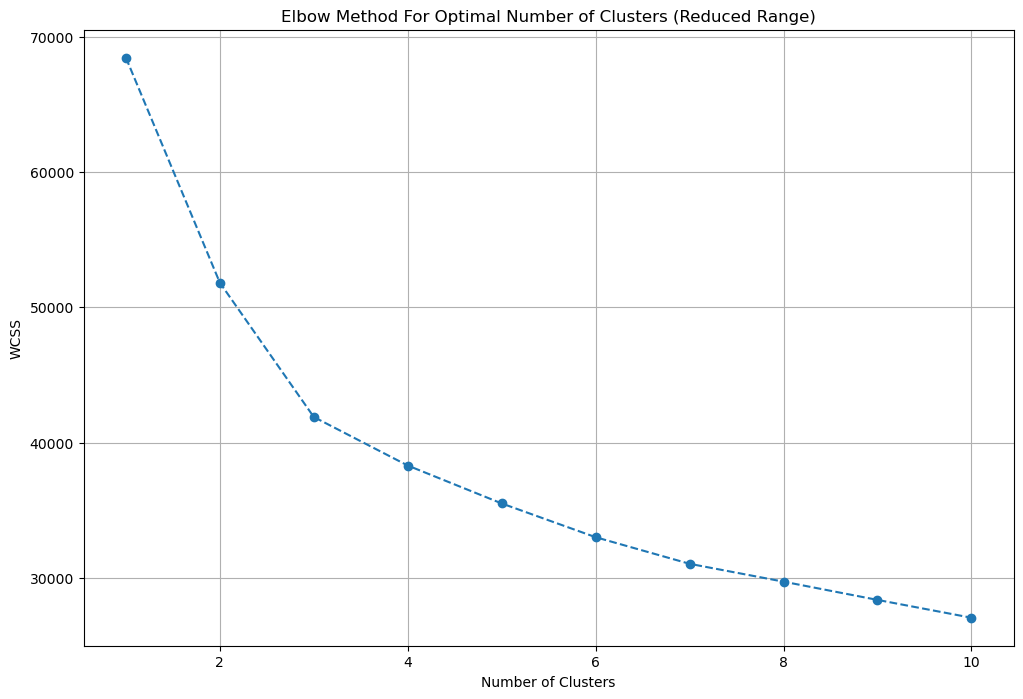

In [51]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [52]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
df = df.iloc[:,:-18]

In [54]:
df['furnishing_type'] = cluster_assignments

In [55]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1493,NaN,2
1883,NaN,2
509,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
2949,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
1608,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


## 5.features

In [56]:
df[['society','features']].sample(5)

,society,features
883,dlf city plots,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1149,tulip violet,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
182,signature global solera,"['Intercom Facility', 'Lift(s)', 'Park']"
3693,dlf express greens,"['Swimming Pool', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2147,ramsons kshitij,NaN


In [57]:
df['features'].isnull().sum()

635

In [58]:
import pandas as pd
app_df = pd.read_csv('real_estate_data_after_scraping.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [59]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [60]:
temp_df = df[df['features'].isnull()]

In [61]:
temp_df.shape

(635, 26)

In [62]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [63]:
df.loc[temp_df.index,'features'] = x.values

In [64]:
df['features'].isnull().sum()

481

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [66]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [67]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2203,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
489,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
816,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
787,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
724,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [68]:
features_binary_df.shape

(3803, 130)

In [69]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\

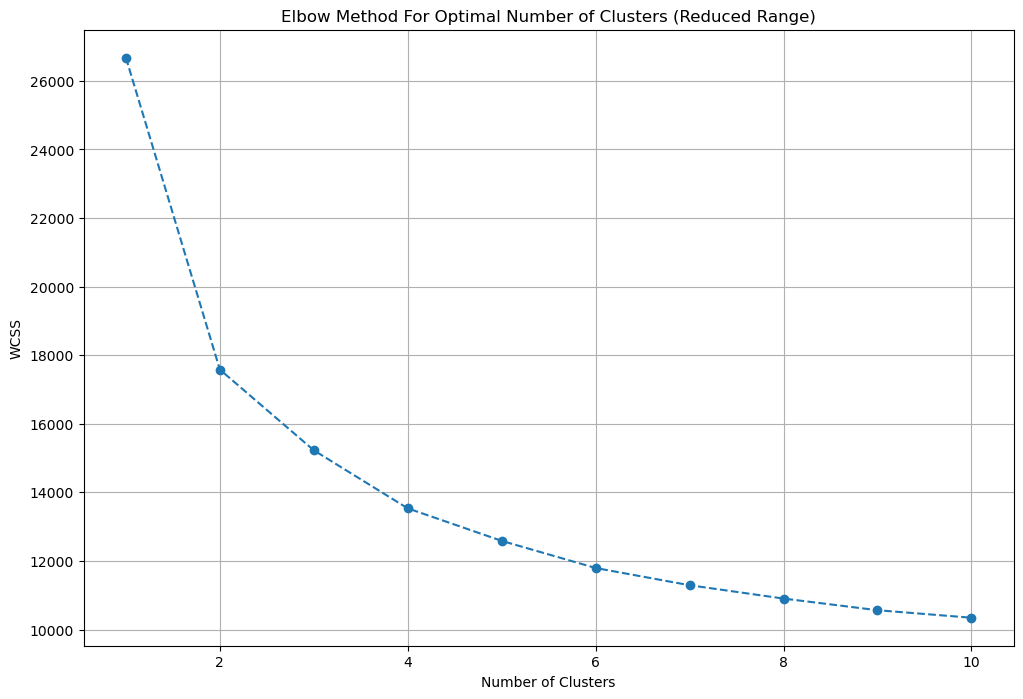

In [70]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [71]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [72]:
df['luxury_score'] = luxury_score

In [73]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3,3,3,"servant room,others",2.0,North-East,New Property,"['Ninex Mall', 'Airia Mall', 'Meditree Market', 'OMAXE Gurgaon Mall', 'Shaheed Bhagat Singh Chowk', 'Sohna Rd', ""St. Angel's Global"", 'Kunskapsskolan International', 'ISKCON', 'HDFC Bank ATM', 'Ektaa Hospitals', 'Oriental Bank of Commerce', 'De Adventure Park', 'Urusvati Museum Of Folklore', 'Leopard hills']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1575.0,0,1,0,0,1,2,"[Security / Fire Alarm, Lift(s), Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Natural Light, Airy Rooms, Fitness Centre / GYM, Club house / Community Center]",77
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,others,2.0,North-East,Relatively New,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0,0,0,0,0,1,1,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Centrally Air Conditioned, Water purifier, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Recently Renovated, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",145
2,flat,dlf the primus,sector 82a,1.59,10338.0,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.),3,3,3+,others,5.0,North-East,Relatively New,"['Sapphire 83', 'NH 48', 'Cambridge Montessori', 'Miracles Apollo Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Hyatt Regency']","['5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '6 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Par

In [74]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [75]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
644,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,Undefined,NaN,NaN,535.0,0,0,0,0,0,2,0
1897,house,independent,sector 11,3.50,15555.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,2,0
1694,flat,alpha corp gurgaonone,sector 84,2.20,6406.0,3434.0,Super Built up area 3434(319.03 sq.m.),4,4,3+,15.0,South-West,Relatively New,3434.0,NaN,NaN,0,1,0,0,0,2,97
1847,house,mian wali,sector 12,1.70,9444.0,1800.0,Plot area 1800(167.23 sq.m.),1,1,1,1.0,NaN,Old Property,NaN,1800.0,NaN,0,1,0,0,0,2,7
2374,house,independent,sector 50,6.50,21667.0,3000.0,Built Up area: 3000 (278.71 sq.m.),5,6,0,1.0,NaN,Undefined,NaN,3000.0,NaN,0,0,0,0,0,2,0


In [76]:
df.shape

(3803, 23)

In [77]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)